In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [99]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [100]:
X_train.shape

(60000, 28, 28)

In [101]:
len(X_train)

60000

In [102]:
X_train[3].shape

(28, 28)

In [103]:
y_train.shape

(60000,)

In [104]:
len(y_train)

60000

In [105]:
X_test.shape

(10000, 28, 28)

In [106]:
len(X_test)

10000

In [107]:
X_test[3].shape

(28, 28)

In [108]:
y_test.shape

(10000,)

In [109]:
len(y_test)

10000

In [ ]:
X_train[0]

In [ ]:
plt.matshow(X_train[3])

In [112]:
y_train[3]

1

In [ ]:
plt.matshow(X_train[20])

In [114]:
y_train[20]

4

In [ ]:
plt.matshow(X_train[0])

In [116]:
y_train[0]

5

In [117]:
#normatization(pixel range from 0 to 256 so dividing by 255 will get 0 and 1 value)
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

In [ ]:
plt.matshow(X_train[0])

In [120]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [ ]:
X_train_flattened[0]

In [122]:
#adding hidden layer sigmoid
from keras.api._v2.keras import activations
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
    ])

In [123]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

In [124]:
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4655 - accuracy: 0.8786
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2623 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2555 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [125]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9278


[0.26421451568603516, 0.9277999997138977]

In [126]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [127]:
y_predicted[0]

array([5.0223656e-03, 1.6344528e-08, 1.8765267e-02, 9.6673399e-01,
       1.3317607e-03, 1.7168193e-01, 3.6816314e-08, 9.9988282e-01,
       9.2470504e-02, 6.6631562e-01], dtype=float32)

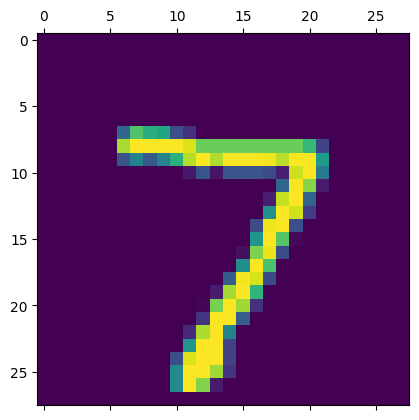

In [128]:
plt.matshow(X_test[0])

In [129]:
np.argmax(y_predicted[0])

7

In [130]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [131]:
y_predicted_labels[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1]

In [139]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    3,    0,    1,    0,    2,    4],
       [   0, 1118,    4,    0,    0,    0,    3,    0,   10,    0],
       [   4,    0,  995,    4,    4,    0,    4,    6,   14,    1],
       [   0,    0,    3,  987,    0,    2,    0,    4,    8,    6],
       [   0,    0,    2,    0,  957,    0,    5,    3,    1,   14],
       [   2,    0,    0,   15,    3,  852,   10,    2,    6,    2],
       [   5,    3,    2,    1,    4,    3,  937,    0,    3,    0],
       [   1,    3,   11,    3,    2,    0,    0,  995,    4,    9],
       [   4,    0,    2,    4,    4,    2,    2,    2,  951,    3],
       [   2,    3,    0,    4,    5,    3,    0,    5,    4,  983]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

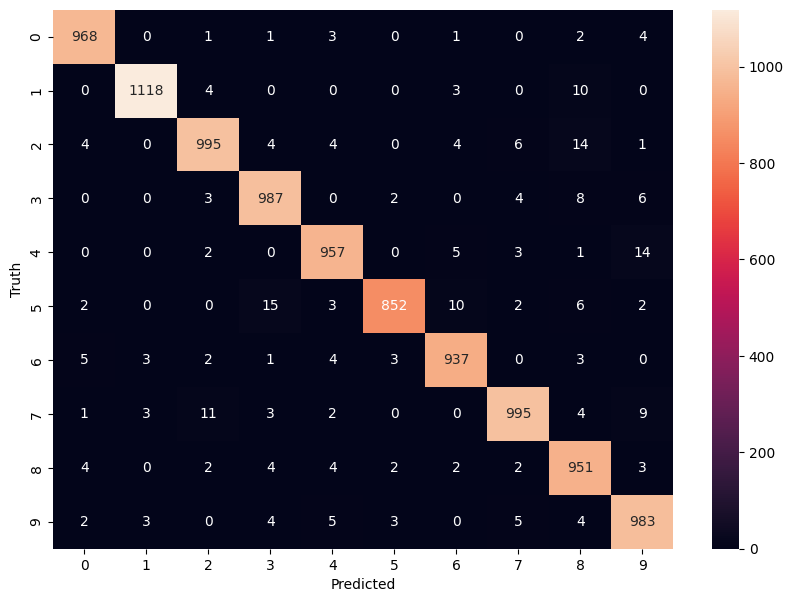

In [140]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [134]:
# again  Adding Hidden Layer relu

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2697 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1204 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0847 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9837


In [135]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9743


[0.08084937930107117, 0.9743000268936157]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

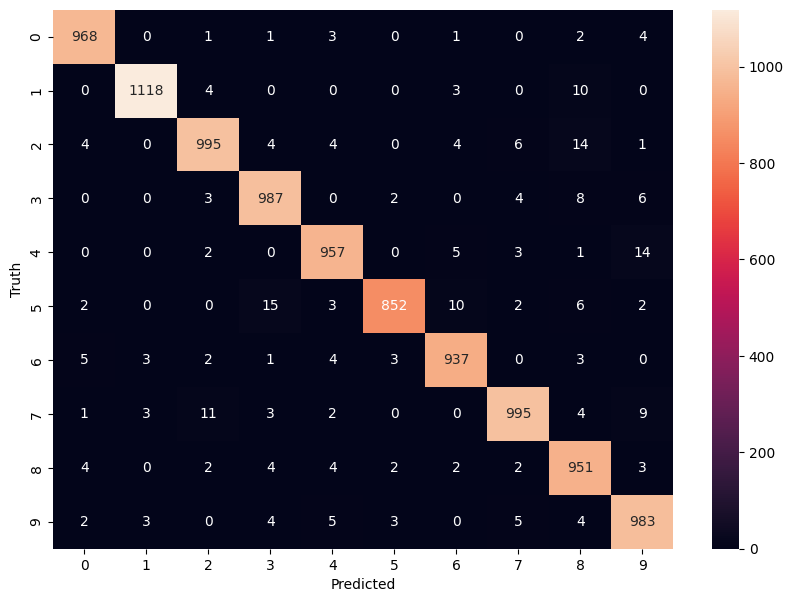

In [136]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [137]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2781 - accuracy: 0.9204
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1268 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0886 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0431 - accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [138]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9787


[0.07683291286230087, 0.9786999821662903]